<a href="https://colab.research.google.com/github/Sivani2005/DigitalBhem/blob/main/Budget_Tracker_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib



In [ ]:
!pip install plyer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.3/142.3 kB 1.2 MB/s eta 0:00:00


In [ ]:
import json
import matplotlib.pyplot as plt
from plyer import notification


In [ ]:
# File to store financial data
df = 'financial_data.json'

In [ ]:
def load_data():
    try:
        with open(df, 'r') as file:
            return json.load(file)
    except FileNotFoundError:
        return {'income': 0, 'expenses': []}

def save_data(data):
    with open(df, 'w') as file:
        json.dump(data, file)

def input_income():
    income = float(input("Enter your income: "))
    data = load_data()
    data['income'] = income
    save_data(data)

def input_expense():
    description = input("Enter expense description: ")
    amount = float(input("Enter expense amount: "))
    data = load_data()
    data['expenses'].append({'description': description, 'amount': amount})
    save_data(data)

def calculate_remaining_budget():
    data = load_data()
    total_expenses = sum(expense['amount'] for expense in data['expenses'])
    remaining_budget = data['income'] - total_expenses
    print(f"Remaining budget: ${remaining_budget:.2f}")
    return remaining_budget





In [ ]:
def visualize_spending():
    data = load_data()
    descriptions = [expense['description'] for expense in data['expenses']]
    amounts = [expense['amount'] for expense in data['expenses']]

    plt.figure(figsize=(10, 5))
    plt.bar(descriptions, amounts, color='blue')
    plt.xlabel('Expense Description')
    plt.ylabel('Amount')
    plt.title('Spending Patterns')
    plt.show()



Menu:
1. Input Income
2. Input Expense
3. Calculate Remaining Budget
4. Visualize Spending
5. Set Expense Alert Limit
6. Exit
Enter your choice: 1
Enter your income: 50000

Menu:
1. Input Income
2. Input Expense
3. Calculate Remaining Budget
4. Visualize Spending
5. Set Expense Alert Limit
6. Exit
Enter your choice: 2
Enter expense description: Food
Enter expense amount: 3500

Menu:
1. Input Income
2. Input Expense
3. Calculate Remaining Budget
4. Visualize Spending
5. Set Expense Alert Limit
6. Exit
Enter your choice: 3
Remaining budget: $46500.00

Menu:
1. Input Income
2. Input Expense
3. Calculate Remaining Budget
4. Visualize Spending
5. Set Expense Alert Limit
6. Exit
Enter your choice: 4


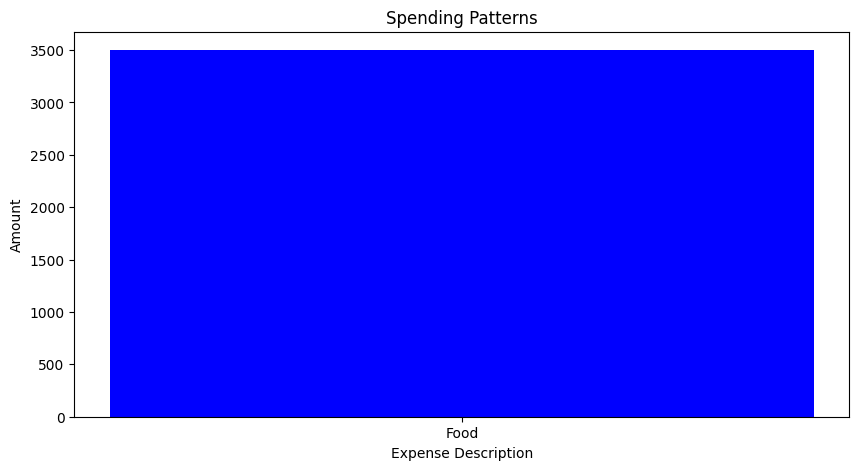


Menu:
1. Input Income
2. Input Expense
3. Calculate Remaining Budget
4. Visualize Spending
5. Set Expense Alert Limit
6. Exit
Enter your choice: 5
Enter the expense alert limit: 45000
Remaining budget: $46500.00

Menu:
1. Input Income
2. Input Expense
3. Calculate Remaining Budget
4. Visualize Spending
5. Set Expense Alert Limit
6. Exit
Enter your choice: 6


In [ ]:
def send_alert(limit):
    """Send alerts when expenses exceed a set limit."""
    remaining_budget = calculate_remaining_budget()
    if remaining_budget < limit:
        notification.notify(
            title='Budget Alert',
            message=f'Your expenses have exceeded the set limit! Remaining budget: ${remaining_budget:.2f}',
            timeout=10
        )

def main():
    """Main function to run the program."""
    while True:
        print("\nMenu:")
        print("1. Input Income")
        print("2. Input Expense")
        print("3. Calculate Remaining Budget")
        print("4. Visualize Spending")
        print("5. Set Expense Alert Limit")
        print("6. Exit")

        choice = input("Enter your choice: ")

        if choice == '1':
            input_income()
        elif choice == '2':
            input_expense()
        elif choice == '3':
            calculate_remaining_budget()
        elif choice == '4':
            visualize_spending()
        elif choice == '5':
            limit = float(input("Enter the expense alert limit: "))
            send_alert(limit)
        elif choice == '6':
            break
        else:
            print("Invalid choice! Please try again.")

if __name__ == "__main__":
    main()